Text

In [20]:
# Run the 1_functions.ipynb to load all functions
%run "1_cleaning.ipynb"

      Progress Priority  Start date Labels
0  Not started   Medium         NaN    NaN
1  Not started   Medium         NaN    NaN
2  Not started   Medium         NaN    NaN
3  Not started   Medium         NaN    NaN
4  Not started      Low  24/03/2025   Blue
       Progress   Priority  Start date  Labels
4   Not started        Low  24/03/2025    Blue
5   Not started  Important  21/03/2025    Blue
6   Not started  Important  21/03/2025    Blue
7   Not started  Important  21/03/2025    Blue
8   Not started     Medium  21/03/2025  Yellow
9   Not started        Low  21/03/2025  Yellow
10  Not started     Medium  20/03/2025    Blue
11  Not started        Low  20/03/2025    Blue
13  Not started  Important  20/03/2025  Yellow
15  In progress     Medium  19/03/2025    Blue
Progress      object
Priority      object
Start date    object
Labels        object
dtype: object
Progress              object
Priority              object
Start date    datetime64[ns]
Labels                object
dtype: obje

/tmp/ipykernel_6750/672462750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Start date"] = df_cleaned["Start date"].astype("datetime64[ns]")  # Ensures it's fully datetime


In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Start date (X) / Labels Count (Y) = Line Chart

In [30]:
def line_chart(df_cleaned):

    # Count occurrences of "Labels" per date
    date_counts = df_cleaned["Start date"].value_counts().sort_index()

    # Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(date_counts.index, date_counts.values, marker="o", linestyle="-", color="b", label="")

    # Formatting
    plt.xlabel(f"From {first_date} to {last_date}")
    plt.ylabel("Questions")
    plt.title("Questions per Day")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Ensure all dates appear on the X-axis
    plt.xticks(date_counts.index, rotation=90)  # Rotate labels for better visibility
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Show every date

    # Return the plot object
    return plt


/tmp/ipykernel_6750/1013773363.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


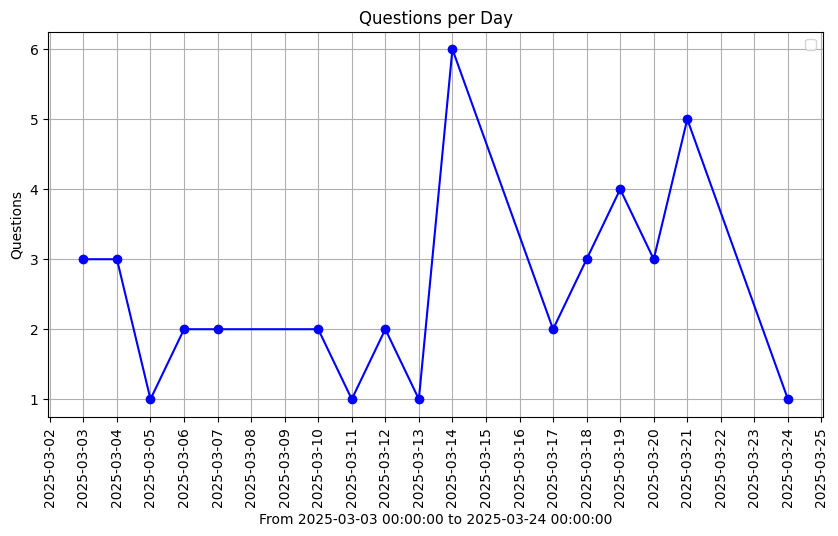

In [ ]:
# print_line_chart = line_chart(df_cleaned)
# print_line_chart.show()

Progress = Pie Chart

In [34]:
def pie_chart(df_cleaned):
    # Replace "In progress" with "Chatter" and all other values with "Email"
    df_cleaned["Progress"] = df_cleaned["Progress"].replace({"In progress": "Chatter"})
    df_cleaned.loc[~df_cleaned["Progress"].isin(["Chatter"]), "Progress"] = "Email"

    # Count occurrences
    progress_counts = df_cleaned["Progress"].value_counts()

    # Create pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(progress_counts, labels=progress_counts.index, autopct='%1.1f%%', 
            colors=["skyblue", "orange"], startangle=140)
    
    plt.title("Where the Questions Come (Chatter vs Email)")
    
    return plt

/tmp/ipykernel_6750/249451539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Progress"] = df_cleaned["Progress"].replace({"In progress": "Chatter"})


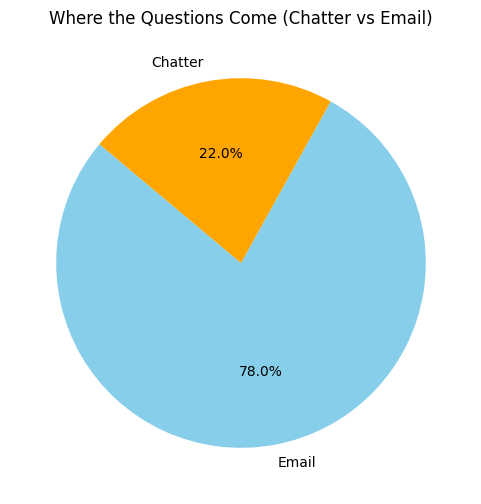

In [ ]:
# print_pie_chart = pie_chart(df_cleaned)
# print_pie_chart.show()

Priority Count (High, Medium, Low) = Bar Chart / Histogram

In [53]:
def bar_chart_1(df):
    # Count occurrences of each unique value in "Labels"
    label_counts = df["Priority"].value_counts()

    # Create bar chart
    plt.figure(figsize=(8, 5))
    bars = plt.bar(label_counts.index, label_counts.values, color=["blue", "yellow", "red"])

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=10, fontweight='bold')    

    # Formatting
    plt.xlabel("Question Labelled As:")
    plt.ylabel("Count of Questions")
    plt.title("Number of Questions")
    plt.xticks(rotation=0)  # Rotate labels for better readability

    return plt


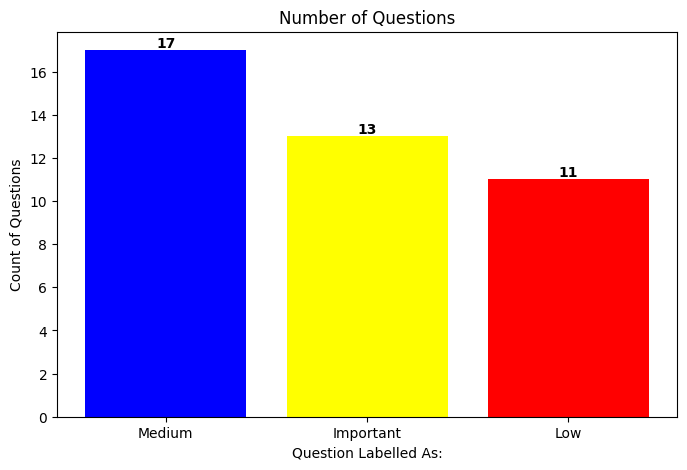

In [ ]:
# print_bar_chart_1 = bar_chart_1(df_cleaned)
# print_bar_chart_1.show()

Country bar

In [45]:
def bar_chart_2(df_cleaned):
    # Count occurrences of each unique value in "Labels"
    label_counts = df_cleaned["Labels"].value_counts()

    # Create bar chart
    plt.figure(figsize=(8, 5))
    bars = plt.bar(label_counts.index, label_counts.values, color=["blue", "yellow", "red"])

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Formatting
    plt.xlabel("Country")
    plt.ylabel("Count of Questions")
    plt.title("Number of Questions per Country")
    plt.xticks(rotation=0)  # Rotate labels for better readability

    return plt

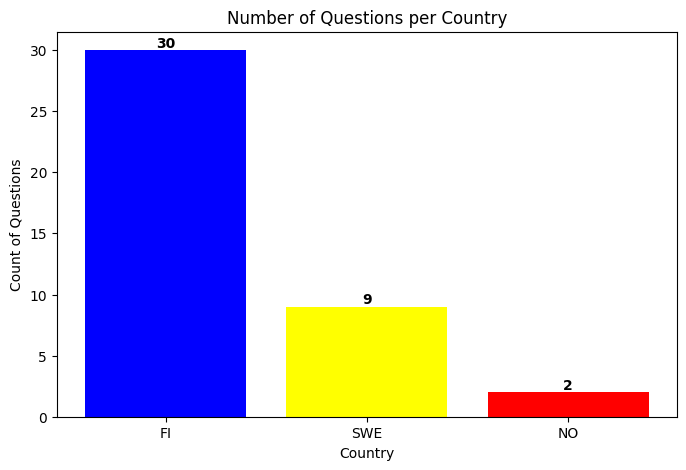

In [ ]:
# print_bar_chart_2 = bar_chart_2(df_cleaned)
# print_bar_chart_2.show()